In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [2]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100)
par_policy = lambda par: (lambda x: par[0] + par[1:].dot(x))
policy = tools.Policy(par_policy,(3))
optimizer = srb.LinearFDEstimator(executer, lincar, max_it=200, eps=0.01, var = 1, 
                                  parameter_domain=np.array([-1,1]), rate = 0.1)

In [3]:
par, conv = optimizer.optimize(policy)

Start Linear Finite Difference optimization:
Initial Parameters: [ 0.32537 -0.57759 -0.98848]
Run: 0  	Parameter: 	[ 0.32537 -0.57759 -0.98848]	Reward: -20.0195811469
		Gradient: 	[-0.15314 -0.19037 -0.13276]


In [4]:
optimizer.parameters

[array([ 0.32537, -0.57759, -0.98848]), array([ 0.31006, -0.59662, -1.00176])]

In [5]:
optimizer.best_parameter

array([ 0.32537, -0.57759, -0.98848])

In [6]:
optimizer.best_reward

-20.019581146880796

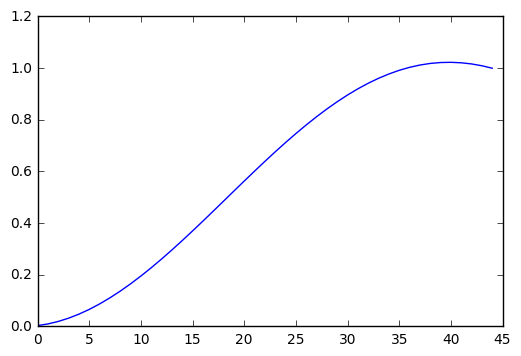

In [7]:
policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

In [23]:
[t[0] for t in trace]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 array([ 0.93529]),
 array([ 0.64512]),
 array([ 0.33726]),
 array([ 0.02158]),
 array([-0.2919]),
 array([-0.59333]),
 array([-0.8733])]